In [55]:
!pip install statsmodels --quiet

In [ ]:
import warnings


In [56]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [58]:
df = pd.read_csv(r"C:\Users\sidduling\Downloads\exchange_rate.csv")

In [59]:
df

,date,Ex_rate
0,1/1/1990 0:00,0.785500
1,2/1/1990 0:00,0.781800
2,3/1/1990 0:00,0.786700
3,4/1/1990 0:00,0.786000
4,5/1/1990 0:00,0.784900
...,...,...
7583,6/10/2010 0:00,0.718494
7584,7/10/2010 0:00,0.721839
7585,8/10/2010 0:00,0.723197
7586,9/10/2010 0:00,0.720825


In [60]:
print("Dataset Preview:")

Dataset Preview:


In [61]:
df.head()

,date,Ex_rate
0,1/1/1990 0:00,0.7855
1,2/1/1990 0:00,0.7818
2,3/1/1990 0:00,0.7867
3,4/1/1990 0:00,0.7860
4,5/1/1990 0:00,0.7849


In [62]:
df.columns = ["Date", "USD_AUD"]

In [63]:
df.columns

Index(['Date', 'USD_AUD'], dtype='object')

In [64]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

In [65]:
df['Date']

0      1990-01-01
1      1990-01-02
2      1990-01-03
3      1990-01-04
4      1990-01-05
          ...    
7583   2010-10-06
7584   2010-10-07
7585   2010-10-08
7586   2010-10-09
7587   2010-10-10
Name: Date, Length: 7588, dtype: datetime64[ns]

In [66]:
print(df['Date'].head(10))

0   1990-01-01
1   1990-01-02
2   1990-01-03
3   1990-01-04
4   1990-01-05
5   1990-01-06
6   1990-01-07
7   1990-01-08
8   1990-01-09
9   1990-01-10
Name: Date, dtype: datetime64[ns]


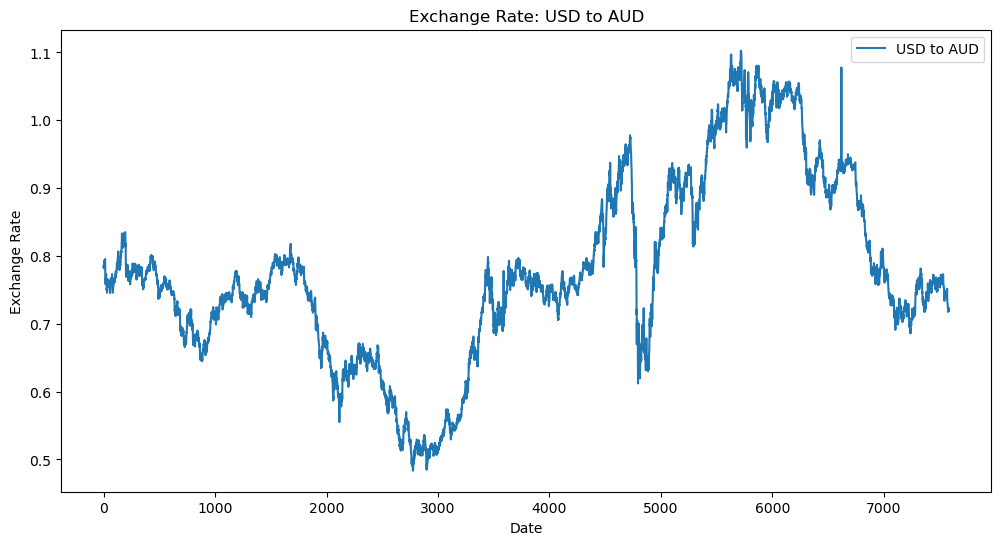

In [67]:
# Plot the time series
plt.figure(figsize=(12,6))
plt.plot(df['USD_AUD'], label='USD to AUD')
plt.title("Exchange Rate: USD to AUD")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()

In [68]:
# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Date       4590
USD_AUD       0
dtype: int64


In [69]:
df['USD_AUD'] = df['USD_AUD'].interpolate()

In [70]:
df['USD_AUD']

0       0.785500
1       0.781800
2       0.786700
3       0.786000
4       0.784900
          ...   
7583    0.718494
7584    0.721839
7585    0.723197
7586    0.720825
7587    0.720825
Name: USD_AUD, Length: 7588, dtype: float64

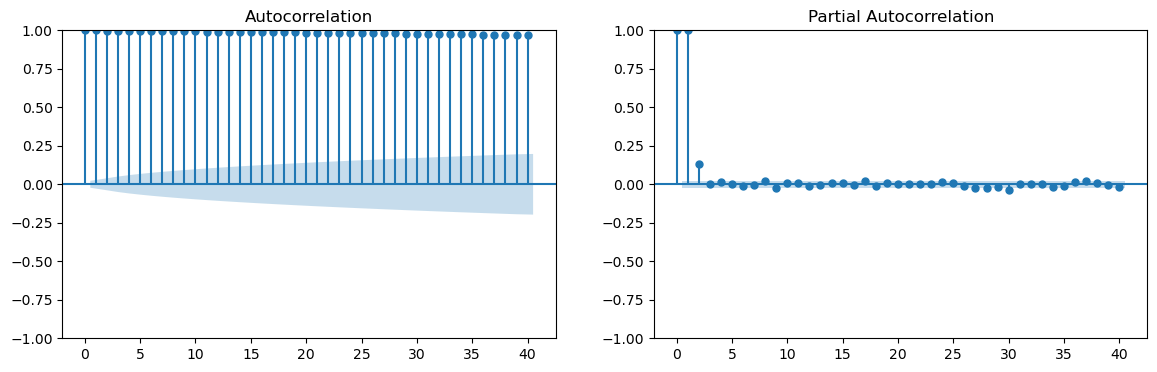

In [71]:
# ACF & PACF Plots
fig, axes = plt.subplots(1,2, figsize=(14,4))
plot_acf(df['USD_AUD'], lags=40, ax=axes[0])
plot_pacf(df['USD_AUD'], lags=40, ax=axes[1], method='ywm')
plt.show()

In [72]:
# Train-test split (last 30 days for testing)
train = df.iloc[:-30]
test = df.iloc[-30:]

In [73]:
train

,Date,USD_AUD
0,1990-01-01,0.785500
1,1990-01-02,0.781800
2,1990-01-03,0.786700
3,1990-01-04,0.786000
4,1990-01-05,0.784900
...,...,...
7553,2010-09-06,0.747831
7554,2010-09-07,0.746436
7555,2010-09-08,0.738662
7556,2010-09-09,0.741125


In [74]:
test

,Date,USD_AUD
7558,2010-09-11,0.745796
7559,2010-09-12,0.745045
7560,NaT,0.747692
7561,NaT,0.745601
7562,NaT,0.747680
7563,NaT,0.744602
7564,NaT,0.744158
7565,NaT,0.745184
7566,NaT,0.744990
7567,NaT,0.748951


In [75]:
arima_model = ARIMA(train['USD_AUD'], order=(1,1,1))

In [76]:
arima_model

In [77]:
arima_fit = arima_model.fit()

In [78]:
arima_fit

In [79]:
print("\nARIMA Model Summary:")


ARIMA Model Summary:


In [80]:
print(arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                USD_AUD   No. Observations:                 7558
Model:                 ARIMA(1, 1, 1)   Log Likelihood               27934.471
Date:                Fri, 22 Aug 2025   AIC                         -55862.942
Time:                        20:53:17   BIC                         -55842.152
Sample:                             0   HQIC                        -55855.806
                               - 7558                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1262      0.045     -2.783      0.005      -0.215      -0.037
ma.L1         -0.0056      0.045     -0.123      0.902      -0.095       0.083
sigma2      3.604e-05   9.99e-08    360.760      0.0

In [81]:
arima_forecast = arima_fit.forecast(steps=30)

In [82]:
arima_forecast

7558    0.744093
7559    0.744151
7560    0.744143
7561    0.744144
7562    0.744144
7563    0.744144
7564    0.744144
7565    0.744144
7566    0.744144
7567    0.744144
7568    0.744144
7569    0.744144
7570    0.744144
7571    0.744144
7572    0.744144
7573    0.744144
7574    0.744144
7575    0.744144
7576    0.744144
7577    0.744144
7578    0.744144
7579    0.744144
7580    0.744144
7581    0.744144
7582    0.744144
7583    0.744144
7584    0.744144
7585    0.744144
7586    0.744144
7587    0.744144
Name: predicted_mean, dtype: float64

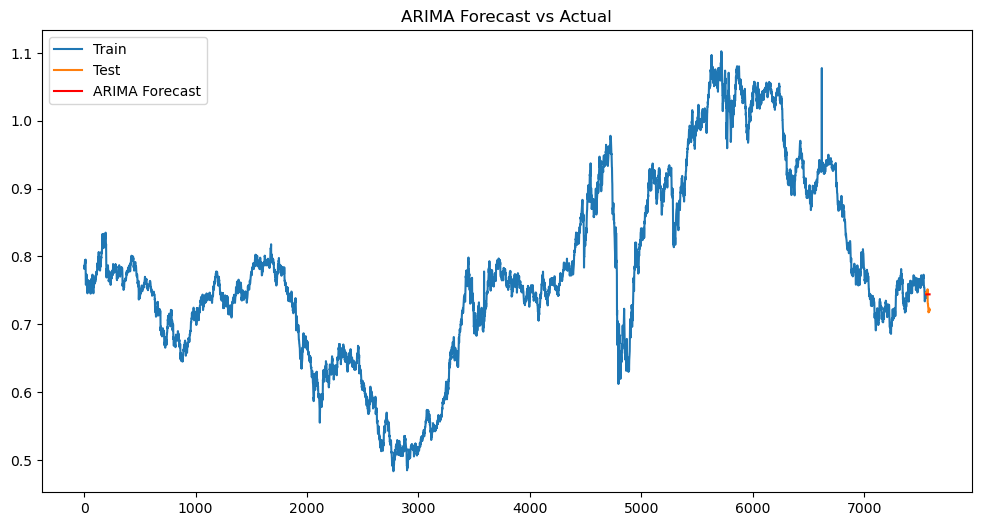

In [83]:
# Plot ARIMA forecast
plt.figure(figsize=(12,6))
plt.plot(train['USD_AUD'], label="Train")
plt.plot(test['USD_AUD'], label="Test")
plt.plot(test.index, arima_forecast, label="ARIMA Forecast", color="red")
plt.title("ARIMA Forecast vs Actual")
plt.legend()
plt.show()

In [84]:
hw_model = ExponentialSmoothing(train['USD_AUD'], trend="add", seasonal=None)
hw_fit = hw_model.fit()

In [85]:
hw_model

In [86]:
hw_forecast = hw_fit.forecast(30)

In [87]:
hw_forecast

7558    0.744070
7559    0.744065
7560    0.744060
7561    0.744055
7562    0.744049
7563    0.744044
7564    0.744039
7565    0.744034
7566    0.744028
7567    0.744023
7568    0.744018
7569    0.744013
7570    0.744007
7571    0.744002
7572    0.743997
7573    0.743992
7574    0.743986
7575    0.743981
7576    0.743976
7577    0.743971
7578    0.743965
7579    0.743960
7580    0.743955
7581    0.743950
7582    0.743944
7583    0.743939
7584    0.743934
7585    0.743929
7586    0.743923
7587    0.743918
dtype: float64

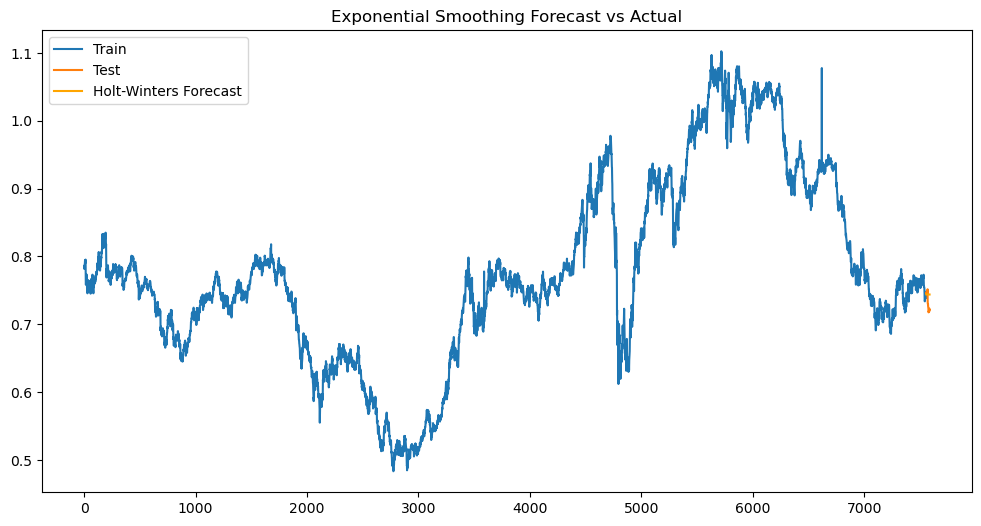

In [88]:
# Plot Holt-Winters forecast
plt.figure(figsize=(12,6))
plt.plot(train['USD_AUD'], label="Train")
plt.plot(test['USD_AUD'], label="Test")
plt.plot(test.index, hw_forecast, label="Holt-Winters Forecast", color="orange")
plt.title("Exponential Smoothing Forecast vs Actual")
plt.legend()
plt.show()

In [89]:

def evaluate(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = math.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred)/y_true))*100
    print(f"{model_name} Performance:")
    print(f" MAE  = {mae:.4f}")
    print(f" RMSE = {rmse:.4f}")
    print(f" MAPE = {mape:.2f}%\n")
    return mae, rmse, mape

In [90]:
evaluate(test['USD_AUD'], arima_forecast, "ARIMA")

ARIMA Performance:
 MAE  = 0.0135
 RMSE = 0.0166
 MAPE = 1.86%



(0.013494600805886185, 0.01663217791311612, 1.863220748560114)

In [91]:
evaluate(test['USD_AUD'], hw_forecast, "Holt-Winters")

Holt-Winters Performance:
 MAE  = 0.0134
 RMSE = 0.0165
 MAPE = 1.85%



(0.013425279039251004, 0.016499781679253492, 1.8534530741048942)

In [92]:
print("""
Conclusion:
- ARIMA captures autocorrelation and trend patterns well.
- Holt-Winters (Exponential Smoothing) is effective when trend/seasonality exist.
- The error metrics (MAE, RMSE, MAPE) help compare which model forecasts better.
- For exchange rates (non-seasonal with trend), ARIMA usually performs slightly better,
  but Holt’s Linear method can also be competitive.
""")


Conclusion:
- ARIMA captures autocorrelation and trend patterns well.
- Holt-Winters (Exponential Smoothing) is effective when trend/seasonality exist.
- The error metrics (MAE, RMSE, MAPE) help compare which model forecasts better.
- For exchange rates (non-seasonal with trend), ARIMA usually performs slightly better,
  but Holt’s Linear method can also be competitive.

